# Cross Market Arbitrage

In [32]:
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import plotly as ply
import plotly.graph_objs as go 
import plotly.subplots as sp

In [33]:
nyse_data = si.get_data("INFY", start_date="2020-01-01", end_date="2020-12-31", index_as_date = True, interval="1d")

In [34]:
nse_data = si.get_data("INFY.NS", start_date="2020-01-01", end_date="2020-12-31", index_as_date = True, interval="1d")

In [35]:
forex_data = si.get_data("USDINR=X", start_date="2020-01-01", end_date="2020-12-31", index_as_date = True, interval="1d")

In [36]:
data_frame_1 = pd.DataFrame({'Close_NYSE_USD': nyse_data['close'].tolist()}, index = nyse_data.index)
data_frame_2 = pd.DataFrame({'Close_NSE_INR': nse_data['close'].tolist()}, index = nse_data.index)
data_frame_3 = pd.DataFrame({'Close_USDINR': forex_data['close'].tolist()}, index = forex_data.index)

In [37]:
data_frame = pd.concat([data_frame_1, data_frame_2, data_frame_3], axis=1)
data_frame = data_frame.dropna()

In [38]:
data_frame['Close_NSE_USD'] = data_frame['Close_NSE_INR'] / data_frame['Close_USDINR']

In [39]:
data_frame['Spread'] = data_frame['Close_NYSE_USD'] - data_frame['Close_NSE_USD']

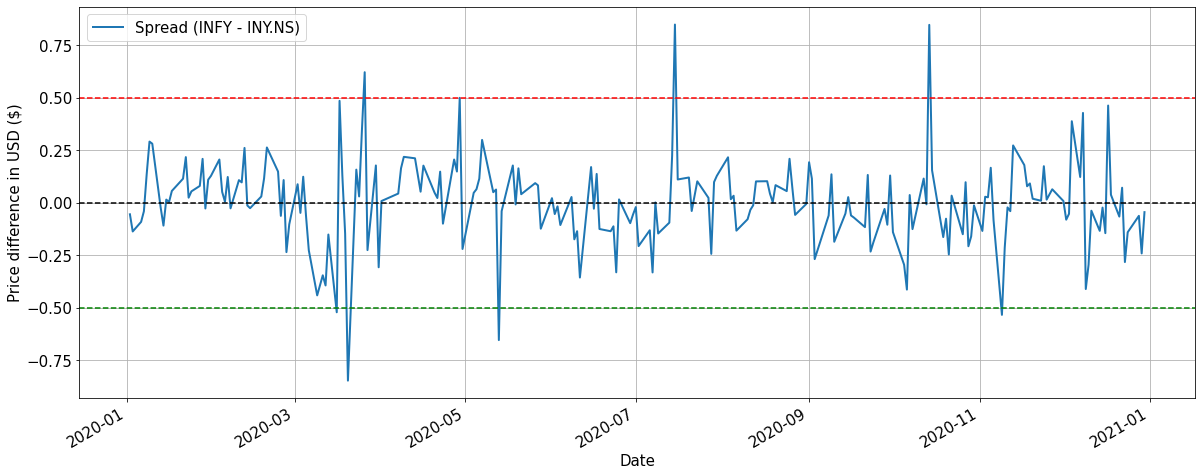

In [40]:
fig = plt.figure(figsize = (20, 8))
plt.tick_params(axis = 'both', labelsize = 15)
data_frame['Spread'].plot(lw = 2., label = 'Spread (INFY - INY.NS)')
plt.axhline(y = 0.5 , color='red', linestyle='--')
plt.axhline(y = 0.0 , color='black', linestyle='--')
plt.axhline(y = -0.5 , color='green', linestyle='--')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Price difference in USD ($)', fontsize = 15)
plt.legend(loc = 'upper left', fontsize = 15)
plt.grid()

In [41]:
import scipy.stats as stats

In [42]:
data_frame['Z-Score'] = stats.zscore(data_frame['Spread'])

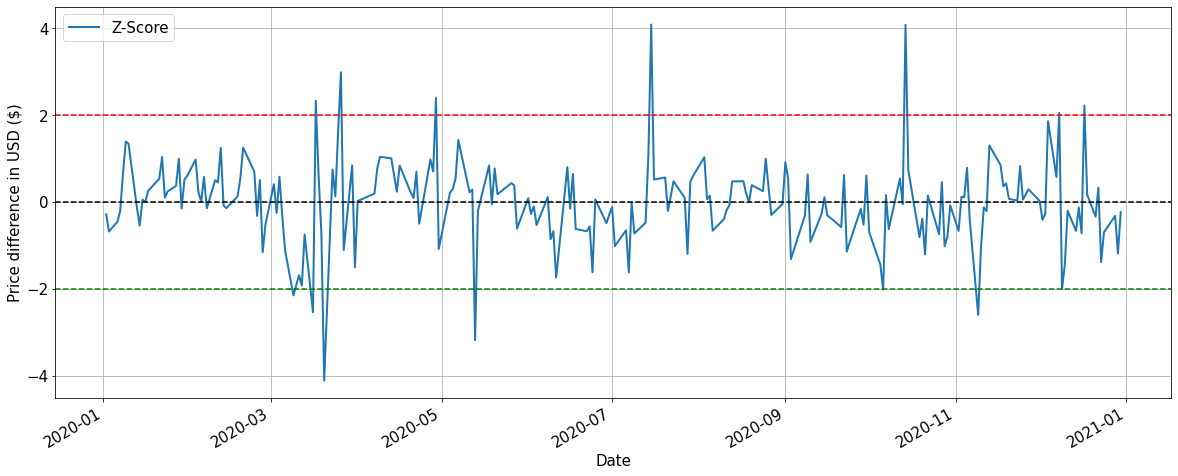

In [43]:
fig = plt.figure(figsize = (20, 8))
plt.tick_params(axis = 'both', labelsize = 15)
data_frame['Z-Score'].plot(lw = 2., label = 'Z-Score')
plt.axhline(y = 2 , color='red', linestyle='--')
plt.axhline(y = 0.0 , color='black', linestyle='--')
plt.axhline(y = -2 , color='green', linestyle='--')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Price difference in USD ($)', fontsize = 15)
plt.legend(loc = 'upper left', fontsize = 15)
plt.grid()

In [48]:
adfuller(data_frame['Z-Score'])

(-8.70718922798734,
 3.673075201744796e-14,
 2,
 214,
 {'1%': -3.4612821203214907,
  '5%': -2.875142613826617,
  '10%': -2.574020122281422},
 575.548303553543)

In [44]:
def generate_signal(data):
    signals_list = []
    for i in range(0, len(data['Z-Score'])):
        if data['Z-Score'][i] > 2.0 :
            signals_list.append(-1)
        elif data['Z-Score'][i] < -2.0:
            signals_list.append(1)
        else:
            signals_list.append(0)   
    return signals_list

In [45]:
data_frame['Signals'] = generate_signal(data_frame)

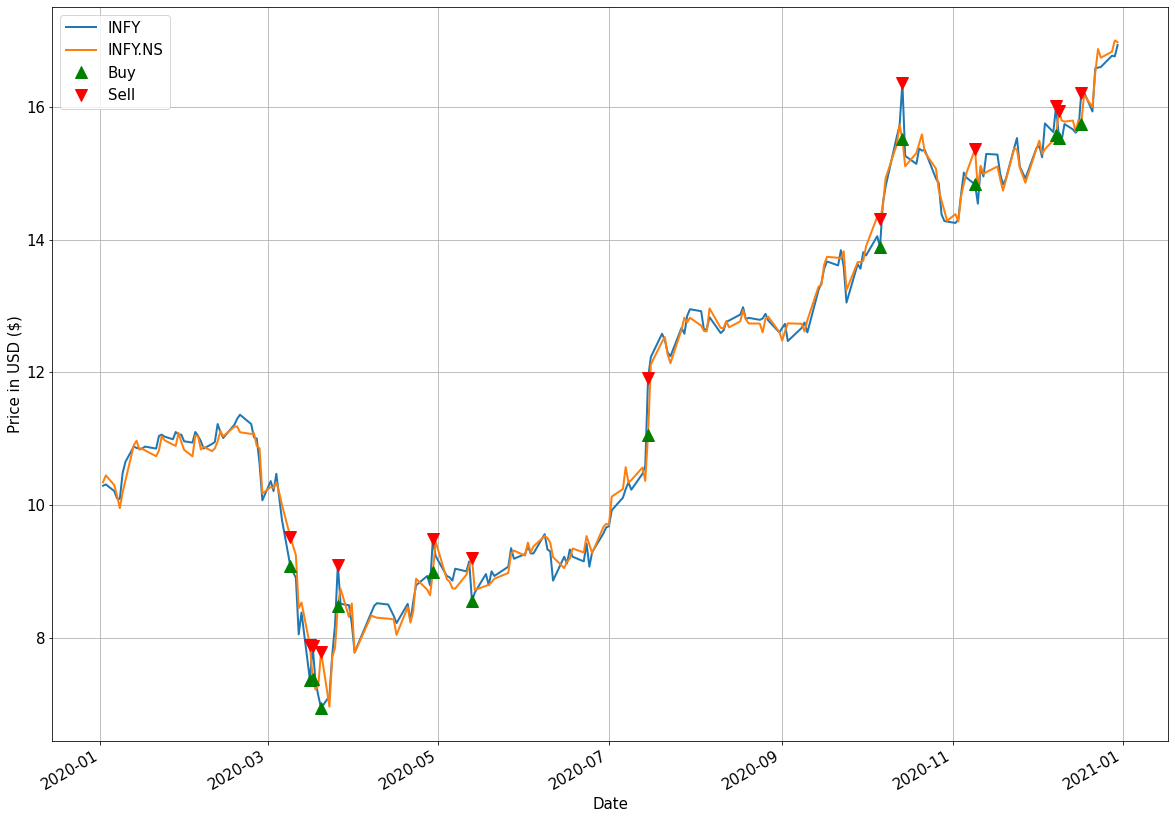

In [46]:
fig = plt.figure(figsize = (20, 15))
plt.tick_params(axis = 'both', labelsize = 15)
data_frame['Close_NYSE_USD'].plot(lw = 2., label = 'INFY')
data_frame['Close_NSE_USD'].plot(lw = 2., label = 'INFY.NS')
plt.plot(data_frame[data_frame['Signals'] == 1].index, data_frame['Close_NYSE_USD'][data_frame['Signals'] == 1], '^', markersize = 12,
         color = 'green', label = 'Buy')
plt.plot(data_frame[data_frame['Signals'] == 1].index, data_frame['Close_NSE_USD'][data_frame['Signals'] == 1], 'v', markersize = 12,
         color = 'red')
plt.plot(data_frame[data_frame['Signals'] == -1].index, data_frame['Close_NYSE_USD'][data_frame['Signals'] == -1], 'v', markersize = 12,
         color = 'red', label = 'Sell')
plt.plot(data_frame[data_frame['Signals'] == -1].index, data_frame['Close_NSE_USD'][data_frame['Signals'] == -1], '^', markersize = 12,
         color = 'green')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Price in USD ($)', fontsize = 15)
plt.legend(loc = 'upper left', fontsize = 15)
plt.grid()

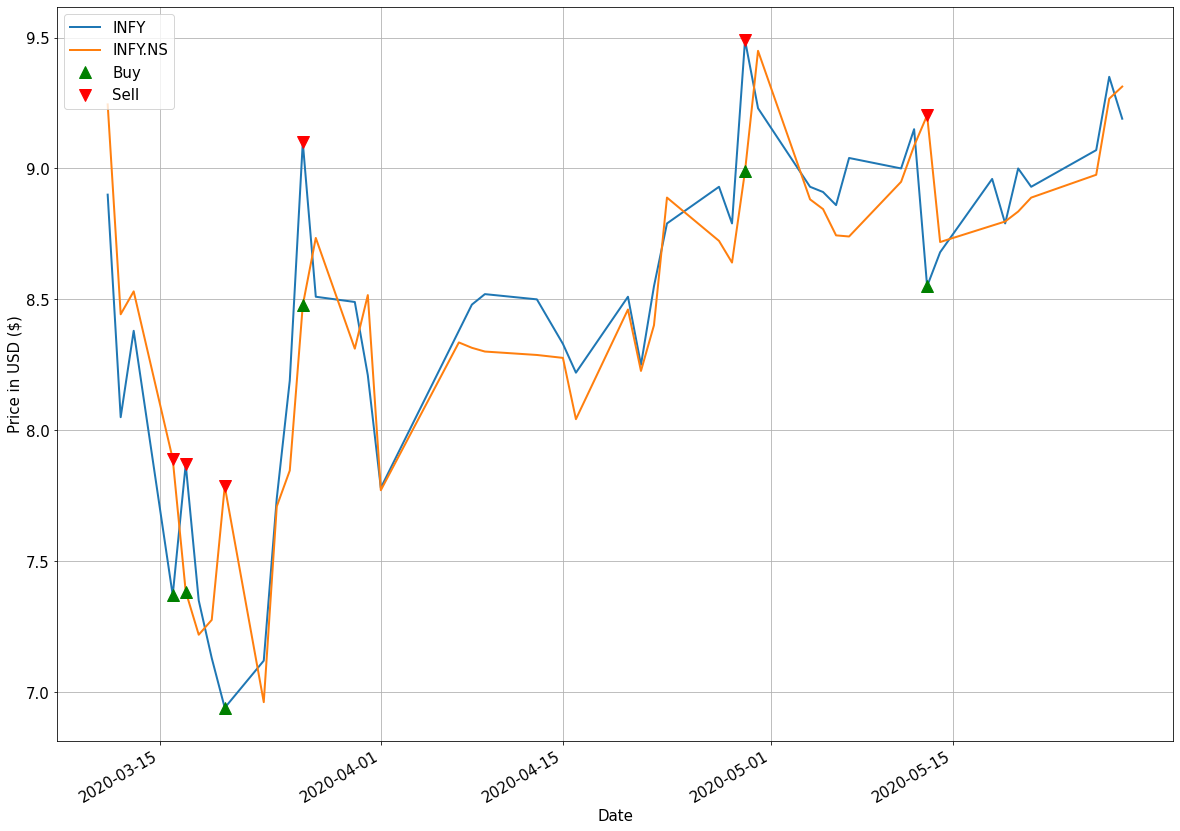

In [47]:
fig = plt.figure(figsize = (20, 15))
plt.tick_params(axis = 'both', labelsize = 15)
data_1 = data_frame['Close_NYSE_USD'][45:90]
data_2 = data_frame['Close_NSE_USD'][45:90]
data_1.plot(lw = 2., label = 'INFY')
data_2.plot(lw = 2., label = 'INFY.NS')
plt.plot(data_frame[45:90][data_frame['Signals'][45:90] == 1].index, data_frame['Close_NYSE_USD'][45:90][data_frame['Signals'][45:90] == 1], '^', markersize = 12,
         color = 'green', label = 'Buy')
plt.plot(data_frame[45:90][data_frame['Signals'][45:90] == 1].index, data_frame['Close_NSE_USD'][45:90][data_frame['Signals'][45:90] == 1], 'v', markersize = 12,
         color = 'red')
plt.plot(data_frame[45:90][data_frame['Signals'][45:90] == -1].index, data_frame['Close_NYSE_USD'][45:90][data_frame['Signals'][45:90] == -1], 'v', markersize = 12,
         color = 'red', label = 'Sell')
plt.plot(data_frame[45:90][data_frame['Signals'][45:90] == -1].index, data_frame['Close_NSE_USD'][45:90][data_frame['Signals'][45:90] == -1], '^', markersize = 12,
         color = 'green')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Price in USD ($)', fontsize = 15)
plt.legend(loc = 'upper left', fontsize = 15)
plt.grid()

# Backtesting

In [49]:
def backtest(data, initial_capital, hold):
    total_list = []
    simple_returns = []
    initial_capital_list = float(initial_capital)
    cumulated_returns = [initial_capital_list]
    cash = float(initial_capital)
    holding = float(0)
    control_value = False
    for i in range(0, len(data['Signals'])):
        if data['Signals'][i] == 1:
            control_value = True
            cash = cash - float(hold) * data['Close_NYSE_USD'][i]
            holding = holding + float(hold) * data['Close_NSE_USD'][i]
            cash = cash + float(hold) * data['Close_NSE_USD'][i]
            holding = holding - float(hold) * data['Close_NSE_USD'][i]
        elif data['Signals'][i] == -1:
            control_value = False
            cash = cash - float(hold) * data['Close_NSE_USD'][i]
            holding = holding + float(hold) * data['Close_NYSE_USD'][i]
            cash = cash + float(hold) * data['Close_NYSE_USD'][i]
            holding = holding - float(hold) * data['Close_NYSE_USD'][i]
        total = cash + holding
        total_list.append(total)
    for i in range(0, len(total_list) - 1):
        return_value = total_list[i + 1]/total_list[i] - float(1)
        simple_returns.append(return_value)
    for i in range(0, len(simple_returns)):
        cumulated_value = cumulated_returns[i] * (simple_returns[i] + float(1))
        cumulated_returns.append(cumulated_value)
    return cumulated_returns  

In [50]:
data_frame['Cumulative Returns'] = backtest(data_frame, 10000, 1000)

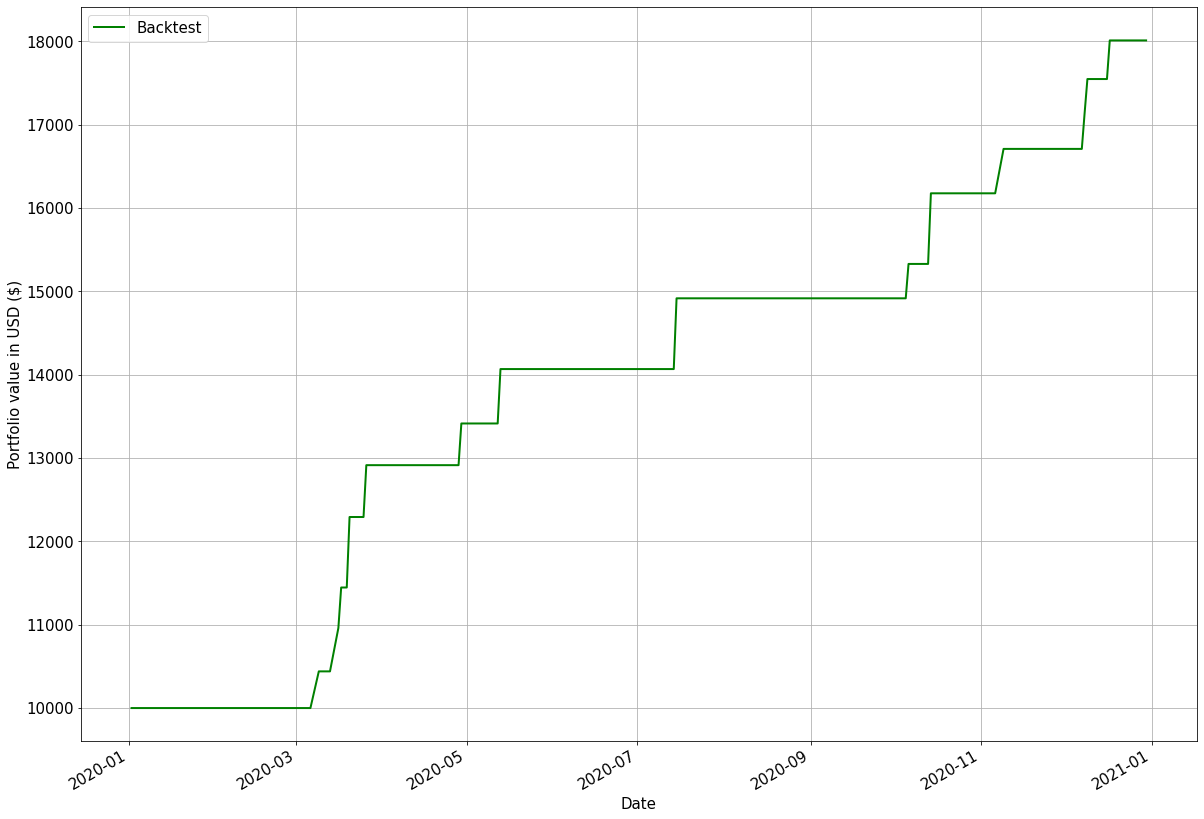

In [51]:
fig = plt.figure(figsize = (20, 15))
plt.tick_params(axis = 'both', labelsize = 15)
data_frame['Cumulative Returns'].plot(lw = 2., color = 'green', label = 'Backtest')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Portfolio value in USD ($)', fontsize = 15)
plt.legend(loc = 'upper left', fontsize = 15)
plt.grid()

In [52]:
print('Infosys (INFY) equity value as of December 31th 2020')
print("%.2f" % data_frame['Cumulative Returns'].tail(1))

print('Absolute return as of December 31th 2020')
print("%.2f" % (((data_frame['Cumulative Returns'].tail(1)/10000.0) - 1.0)*100))

Infosys (INFY) equity value as of December 31th 2020
18012.73
Absolute return as of December 31th 2020
80.13
